## Why the odd name

Simulating randomness. A bit of an odd name right? Well it calls attention to something incredibly important with random variables. And that is that they are (often) just simulations of how real life random events work. 

What do I mean by this?

Well the answer is two-fold:

1. **Real life isn't always about numbers**. If I told you to pick a random color, you could. If I told you to make a random variable give me back a random color, you might be hard pressed. A random variable can only return a number, so how do I give you a color. For a random variable to simulat this real life event, you would have to convert color into  a number (like RGB) and return that number instead.
2. **Real life isn't so exact**. In real life nothing is so exactly random. While a coin flip is generally regarded as a 50-50 shot, certain coins are a bit more unbalanced than most.

For these two reasons, r.v. are just simulations. More importantly though, r.v. **are** simulating something. Each r.v. is tied to a real event that can happen in life. These are not meaningless numbers, they are instead representing/simulating real things, like coin flips or dollars earned. 

## Making r.v.

So in part to test what we have learned and in part ot build intuition, let's simulate some real life events using a random variable.

First up, flipping a coin. We know that heads has a 50% shot and tails a 50% shot, but how do we represent heads and tails as a number. what about 1 and -1? then our r.v. would look like:

In [1]:
from numpy.random import rand

def coin_toss():
    if rand() > 0.5:
        return 1
    else:
        return -1

But that choice of value is irrelavant. You could choose anything. In fact the typical choice is using 0 and 1 (called a Bernoulli r.v.).

Let's do another one. How about rolling a die. In this can the numbers we should choose to represent each side are a bit more obvious. In this case, the number 1 though 6. Below is how you'd represent that:

In [2]:
def roll_die():
    return int(rand() * 6) + 1

What about how long you might wait to catch a bus in minutes? Well it could show up immediately, or the bus route could be canceled and it won't show up for another 20 years. That being said it is very likely to show up in the next minute. What random variable could you use? 

Well in order to make 0 - 1 into a time that could be almost infinitely long, you could take the negative log of it, so perhaps a good r.v. would be:

In [8]:
import numpy as np

def expoential_rv():
    return - np.log(rand())

This is also a special distribution called the exponential distribution (though it might should be called the logarithmic distribution!)

And there are so many more! Below I printed out the names of the r.v. implemented in numpy:

In [9]:
np.random.__all__

['beta',
 'binomial',
 'bytes',
 'chisquare',
 'choice',
 'dirichlet',
 'exponential',
 'f',
 'gamma',
 'geometric',
 'get_state',
 'gumbel',
 'hypergeometric',
 'laplace',
 'logistic',
 'lognormal',
 'logseries',
 'multinomial',
 'multivariate_normal',
 'negative_binomial',
 'noncentral_chisquare',
 'noncentral_f',
 'normal',
 'pareto',
 'permutation',
 'poisson',
 'power',
 'rand',
 'randint',
 'randn',
 'random_integers',
 'random_sample',
 'rayleigh',
 'seed',
 'set_state',
 'shuffle',
 'standard_cauchy',
 'standard_exponential',
 'standard_gamma',
 'standard_normal',
 'standard_t',
 'triangular',
 'uniform',
 'vonmises',
 'wald',
 'weibull',
 'zipf',
 'ranf',
 'random',
 'sample']

This being said, you can go ahead and devote time to studying each of these if you wish. They each have unique properties and are important for their own reasons. But you already know the most important facts about distributions:

ramdom variable is a function with the following properties:

* It is stateless (it doesn't depend on anything but it's arguements)
* It can take in any number of other random variables as arguements
* It returns any number of numbers
* It can use a random number generator to generate numbers from 0 to 1 uniformly

In fact all the functions above can be constructed using only the 0 - 1 random variable!

## Properties of r.v.

What is even more interesting is that these r.v. can be described using the summary statistics that we saw before:

1. Center statistics. Things that tell us where the center or majority of the data lives. Eg. the mean, median and mode (plus a ton of other arcane measures, geometric mean, winsorized mean, etc.)
2. Spread. Measures how far away from the center is your data. Eg. standard deviation and variance (plus again a ton of other measures like the absolute deviation, range, gini coefficient, etc.)
3. Dependence. How related are two factors. Eg. correlation (Pearson's specifically)
4. Shape. What is the shape of the distribution of the data (skewness and kurtosis)

But how?

Remember, once we had a dataset we could calculate and visualize all of the above. But we don't have a dataset, we just have a r.v. :(

Well in fact we have both. Remember last week we sampled from a r.v., well if we pull enough samples, then we will be able to get the summary statistics of a r.v. too.

Let's try it out. Let's get the mean of our exponential distribution:

In [11]:
np.mean([expoential_rv() for i in range(5)])

0.90492410928104294

Done, right...?

Well it is a little more complicated than that.

To get the real mean (not an approximate mean) of a r.v. you would have to take INFINITE SAMPLES!!!!

And that is a bit too many... So what can we do instead? 

Well we can just take a sufficiently large sample. So instead of five, how about OVER 9000!!!! (Close enough to infinity right!):

In [12]:
np.mean([expoential_rv() for i in range(9001)])

0.99811335111363186

And tada! We are actually pretty close to what the actual mean should be (1 if you were guessing). 

And we can do the same thing with all the other measures, so for example we can print the standard deviation (should also be near 1):

In [13]:
np.std([expoential_rv() for i in range(9001)])

1.0428196307964019

And we can even plot it's distribution:

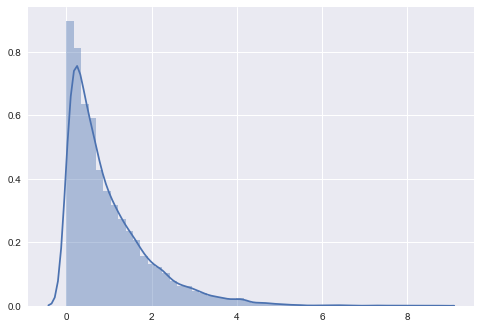

In [14]:
%matplotlib inline
import seaborn as sns

sns.distplot([expoential_rv() for i in range(9001)])

Quiz time! Does this distribution have heavy skew or kurtosis???

## Why does this matter

Why did we learn so much about distributions? How will this help at all?

Well if you'd been paying attention, then the answer should be screaming at you. 

Above we considered a real life situation: waiting on the bus. We simulated this situation using a random variable. We then were able to calculate what the expected amount of time that we would wait. How far on average are other expected times. What the distribution would look like. A ton of stuff! 

If we simulate real world situations with r.v. then you are able to answer a ton of quantitative questions about that situation that you would not have otherwise been able to answer.

Next time we will be talking about statistic's second favorite acronym, iid. This will give us the tools that we will need to answer the big questions. But next time!